In [13]:
# imports
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
# Functions
def hard_vote(y_preds_list):
    # Ensure all predictions are integer type
    y_preds_list = [pred.astype(int) for pred in y_preds_list]
    preds = np.stack(y_preds_list, axis=1)
    return np.array([np.argmax(np.bincount(row, minlength=3)) for row in preds])

In [15]:
# Load prediction data from all models in ensemble
y_pred_lr = np.load("results/y_pred_lr.npy").astype(int)
y_pred_dt = np.load("results/y_pred_dt.npy").astype(int)
y_pred_ocsvm = np.load("results/y_pred_ocsvm.npy").astype(int)
y_pred_svm = np.load("results/y_pred_svm.npy").astype(int)
y_pred_knn = np.load("results/y_pred_knn.npy").astype(int)
# Clustering here
# Random Forest here
y_test = np.load("results/y_test.npy").astype(int)

y_ensemble = hard_vote([y_pred_lr, y_pred_dt, y_pred_ocsvm, y_pred_svm])

# Evaluation
print("\n Ensemble Voting Report with Hard Voting")
print(classification_report(y_test, y_ensemble))


 Ensemble Voting Report with Hard Voting
              precision    recall  f1-score   support

           0       0.83      0.69      0.75     38116
           1       0.02      0.21      0.04       906
           2       0.16      0.10      0.13      6935

    accuracy                           0.59     45957
   macro avg       0.34      0.33      0.30     45957
weighted avg       0.71      0.59      0.64     45957



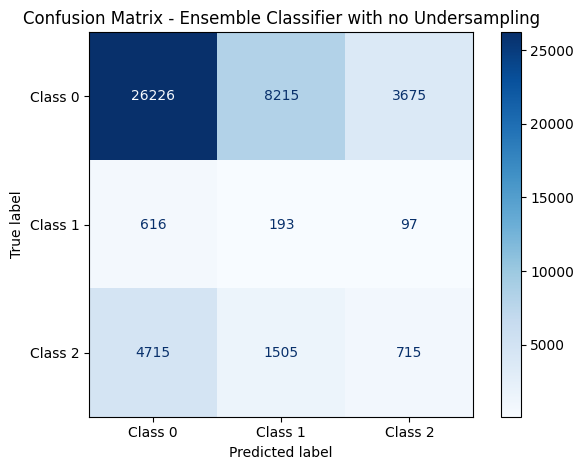

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_ensemble, labels=[0, 1, 2])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Ensemble Classifier with no Undersampling")
plt.grid(False)
plt.tight_layout()
plt.show()